In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sequential = False

In [3]:
relevant_columns = ['now', 'cpu.user', 'mem.used', 'load.min1', 'load.min5', 'load.min15']
if sequential:
    wally113 = pd.read_csv('../data/sequential_data/metrics/wally113_metrics.csv').loc[:,relevant_columns]
    wally117 = pd.read_csv('../data/sequential_data/metrics/wally117_metrics.csv').loc[:,relevant_columns]
    wally122 = pd.read_csv('../data/sequential_data/metrics/wally122_metrics.csv').loc[:,relevant_columns]
    wally123 = pd.read_csv('..data/sequential_data/metrics/wally123_metrics.csv').loc[:,relevant_columns]
    wally124 = pd.read_csv('../data/sequential_data/metrics/wally124_metrics.csv').loc[:,relevant_columns]
else:    
    wally113 = pd.read_csv('../data/concurrent_data/metrics/wally113_metrics_concurrent.csv').loc[:,relevant_columns]
    wally117 = pd.read_csv('../data/concurrent_data/metrics/wally117_metrics_concurrent.csv').loc[:,relevant_columns]
    wally122 = pd.read_csv('../data/concurrent_data/metrics/wally122_metrics_concurrent.csv').loc[:,relevant_columns]
    wally123 = pd.read_csv('../data/concurrent_data/metrics/wally123_metrics_concurrent.csv').loc[:,relevant_columns]
    wally124 = pd.read_csv('../data/concurrent_data/metrics/wally124_metrics_concurrent.csv').loc[:,relevant_columns]
data = [wally113, wally117, wally122, wally123, wally124]

In [4]:
def collect_columns_from_data(name):
    return {'wally113': wally113[name], 'wally117': wally117[name], 'wally122': wally122[name], 'wally123': wally123[name], 'wally124': wally124[name]}

In [5]:
def boxplot_column(name, ax, c=['wally113', 'wally117', 'wally122', 'wally123', 'wally124']):
    data = collect_columns_from_data(name)
    data_df = pd.DataFrame(data)
    data_df.boxplot(column=c, ax=ax,showfliers=False)

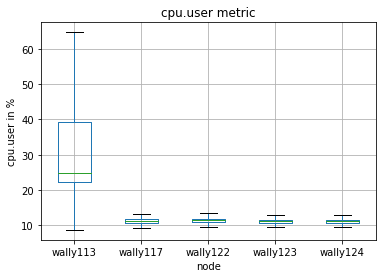

In [6]:
fig, ax = plt.subplots()
ax.set(xlabel='node', ylabel='cpu.user in %', title='cpu.user metric')
boxplot_column('cpu.user', ax)

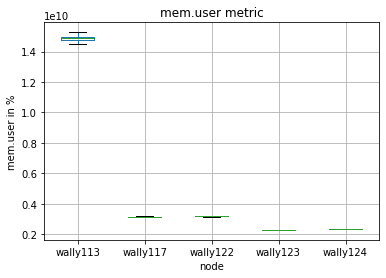

In [7]:
fig, ax = plt.subplots()
ax.set(xlabel='node', ylabel='mem.user in %', title='mem.user metric')
boxplot_column('mem.used', ax)

In [8]:
def plot_load_metric(name):
    fig, ax = plt.subplots(1, 2)
    fig.suptitle('%s metric' % name)
    yl = '%s in percent' % name
    ax[0].set(xlabel='node', ylabel=yl, title='control node')
    ax[1].set(xlabel='node', ylabel=yl, title='computing nodes')
    boxplot_column(name, ax[0], c=['wally113'])
    boxplot_column(name, ax[1], c=['wally117', 'wally122', 'wally123', 'wally124'])

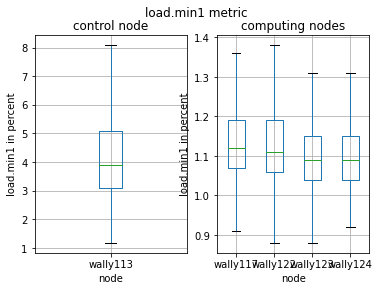

In [9]:
plot_load_metric('load.min1')

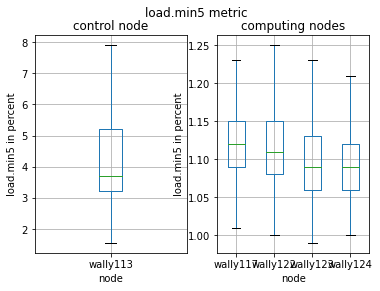

In [10]:
plot_load_metric('load.min5')

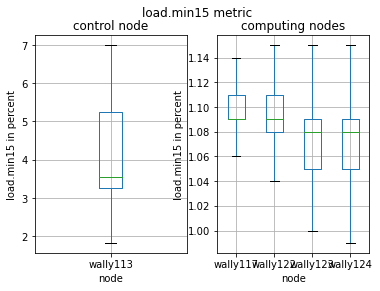

In [11]:
plot_load_metric('load.min15')